In [80]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
df = pd.read_csv('Social Media Engagement Dataset.csv', encoding="Latin1")
print(f"Dataset cargado: {df.shape}")

Dataset cargado: (12000, 28)


Crear la copia, eliminar columnas sobrantes de la copia, y traducir los nobres de columnas

In [81]:
# crear una copia
df_copia = df.copy()

# eliminar columnas innecesarias
df_copia = df_copia.drop(columns=["post_id"])
df_copia = df_copia.drop(columns=["buzz_change_rate"])
df_copia = df_copia.drop(columns=["user_past_sentiment_avg"])
df_copia = df_copia.drop(columns=["user_engagement_growth"])
df_copia = df_copia.drop(columns=["toxicity_score"])
df_copia = df_copia.drop(columns=["sentiment_score"])

# renombrar columnas al español
df_copia = df_copia.rename(columns={
    "likes_count": "likes",
    "text_content": "contenido",
    "platform": "plataforma",
    "user_id": "id_usuario",
    "day_of_week": "dia_semana",
    "mentions": "menciones",
    "keywords": "palabras_clave",
    "impressions": "visualizaciones",
    "engagement_rate": "tasa_compromiso",
    "brand_name": "nombre_marca",
    "product_name": "nombre_producto",
    "campaign_name": "nombre_campaña",
    "campaign_phase": "fase_campaña",
    "location": "ubicacion",
    "comments_count": "numero_comentarios",
    "language": "idioma",
    "shares_count": "numero_compartidos",
    "emotion_type": "emocion",
    "topic_category": "categoria_tema",
    "sentiment_score": "puntaje_sentimiento",
    "sentiment_label": "etiqueta_sentimiento"
})
df_copia.head()


,timestamp,dia_semana,plataforma,id_usuario,ubicacion,idioma,contenido,hashtags,menciones,palabras_clave,...,emocion,likes,numero_compartidos,numero_comentarios,visualizaciones,tasa_compromiso,nombre_marca,nombre_producto,nombre_campaña,fase_campaña
0,2024-12-09 11:26:15,Monday,Instagram,user_52nwb0a6,"Melbourne, Australia",pt,Just tried the Chromebook from Google. Best pu...,#Food,NaN,"price, unique, traditional, efficient",...,Confused,1264,1704,701,18991,0.19319,Google,Chromebook,BlackFriday,Launch
1,2024-07-28 19:59:26,Sunday,Twitter,user_ucryct98,"Tokyo, Japan",ru,Just saw an ad for Microsoft Surface Laptop du...,"#MustHave, #Food","@CustomerService, @BrandCEO","delivery, slow",...,Angry,522,1803,359,52764,0.05086,Microsoft,Surface Laptop,PowerRelease,Post-Launch
2,2024-11-23 14:00:12,Saturday,Reddit,user_7rrev126,"Beijing, China",ru,What's your opinion about Nike's Epic React? ...,"#Promo, #Food, #Trending",NaN,"reliable, budget, durable, experience",...,Confused,2689,705,643,8887,0.45425,Nike,Epic React,BlackFriday,Post-Launch
3,2024-09-16 04:35:25,Monday,YouTube,user_4mxuq0ax,"Lagos, Nigeria",en,Bummed out with my new Diet Pepsi from Pepsi! ...,"#Reviews, #Sustainable","@StyleGuide, @BrandSupport","improved, competitive, luxury, fast",...,Sad,1827,262,743,6696,0.42293,Pepsi,Diet Pepsi,LaunchWave,Launch
4,2024-09-05 21:03:01,Thursday,Twitter,user_l1vpox2k,"Berlin, Germany",hi,Just tried the Corolla from Toyota. Absolutely...,"#Health, #Travel","@BrandSupport, @InfluencerName","innovation, budget, helpful, luxury",...,Happy,2005,1443,703,47315,0.08773,Toyota,Corolla,LocalTouchpoints,Launch


Convertir la columna de fecha a tipo datetime y extraer componentes

In [82]:
# convertir la columna de fecha a tipo datetime y extraer componentes
df_copia["timestamp"] = pd.to_datetime(df_copia["timestamp"])
df_copia["Año"] = df_copia["timestamp"].dt.year
df_copia["Mes"] = df_copia["timestamp"].dt.month
df_copia["Dia"] = df_copia["timestamp"].dt.day
df_copia["Hora"] = df_copia["timestamp"].dt.hour
df_copia["Nombre Mes"] = df_copia["timestamp"].dt.month_name()

df_copia.describe()

,timestamp,likes,numero_compartidos,numero_comentarios,visualizaciones,tasa_compromiso,Año,Mes,Dia,Hora
count,12000,12000.00000,12000.000000,12000.00000,12000.000000,12000.000000,12000.000000,12000.00000,12000.000000,12000.000000
mean,2024-10-30 09:11:56.604916736,2490.72025,1007.167167,504.34575,49811.338500,0.278137,2024.325750,6.55675,15.769250,11.497917
min,2024-05-01 01:04:04,0.00000,0.000000,0.00000,130.000000,0.001880,2024.000000,1.00000,1.000000,0.000000
25%,2024-07-31 17:31:49.500000,1236.00000,510.000000,253.00000,24716.500000,0.049100,2024.000000,4.00000,8.000000,5.000000
50%,2024-10-31 03:49:36.500000,2496.00000,1018.000000,503.00000,49674.000000,0.080605,2024.000000,7.00000,16.000000,12.000000
75%,2025-01-28 13:32:56.750000128,3723.25000,1501.000000,755.00000,74815.000000,0.163123,2025.000000,10.00000,23.000000,18.000000
max,2025-04-30 23:46:43,5000.00000,2000.000000,1000.00000,99997.000000,32.211710,2025.000000,12.00000,31.000000,23.000000
std,NaN,1441.53253,575.072282,288.68416,28930.289451,1.149206,0.468674,3.45588,8.827363,6.967296


Extrater el pais de la columna ubicacion y mapear los paises a sus continentes

In [83]:
# extraer el país de la columna de ubicación
df_copia["pais"] = df_copia["ubicacion"].str.split(",").str[-1].str.strip()

# mapear países a continentes
country_to_continent = {
    "Spain": "Europe",
    "France": "Europe",
    "Germany": "Europe",
    "Italy": "Europe",
    "UK": "Europe",
    "Canada": "North America",
    "Mexico": "North America",
    "USA": "North America",
    "Brazil": "South America",
    "Japan": "Asia",
    "India": "Asia",
    "China": "Asia",
    "Singapore": "Asia",
    "UAE": "Asia",
    "South Korea": "Asia",
    "Australia": "Oceania",
    "South Africa": "Africa",
    "Nigeria": "Africa",
    "Egypt": "Africa"
}

# agregar columna de continente
df_copia["continente"] = df_copia["pais"].map(country_to_continent)

orden_dias = [
    "Monday", "Tuesday", "Wednesday",
    "Thursday", "Friday", "Saturday", "Sunday"
]



Sacar info general sobre el dataset

In [84]:
print("Número de publicaciones:", len(df_copia))
print("Usuarios únicos:", df_copia["id_usuario"].nunique())
print("Plataformas:", df_copia["plataforma"].unique())
print("Fecha inicio:", df_copia["timestamp"].min())
print("Fecha fin:", df_copia["timestamp"].max())


Número de publicaciones: 12000
Usuarios únicos: 12000
Plataformas: ['Instagram' 'Twitter' 'Reddit' 'YouTube' 'Facebook']
Fecha inicio: 2024-05-01 01:04:04
Fecha fin: 2025-04-30 23:46:43


crear columna de interacciones totales

In [85]:
df_copia["interacciones_totales"] = (
    df_copia["likes"]
    + df_copia["numero_comentarios"]
    + df_copia["numero_compartidos"]
)

## Volumetria de datos
Ver como se distribuyen las publicaciones por continente

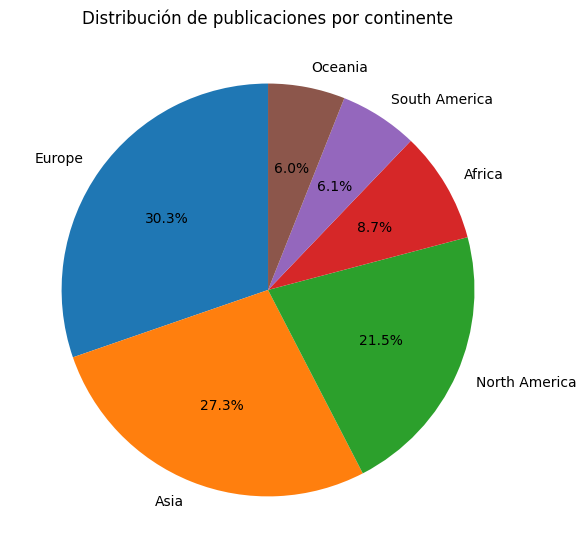

In [86]:
continentes = df_copia["continente"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    continentes.values,
    labels=continentes.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Distribución de publicaciones por continente")
plt.tight_layout()
plt.show()


Engagement medio por continente

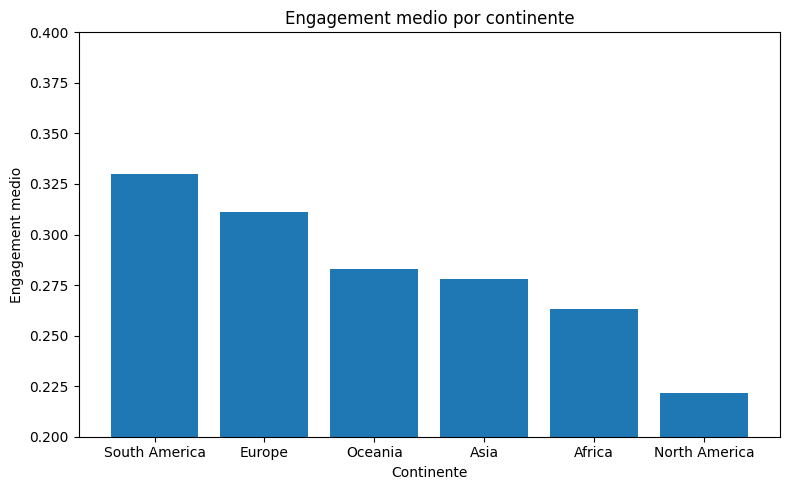

In [87]:
eng_continente = df_copia.groupby("continente")["tasa_compromiso"].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
plt.bar(eng_continente.index, eng_continente.values)
plt.ylim(0.2, 0.4)
plt.xlabel("Continente")
plt.ylabel("Engagement medio")
plt.title("Engagement medio por continente")
plt.tight_layout()
plt.show()


Volumen de publicaciones por plataforma (Instagram la que menos)

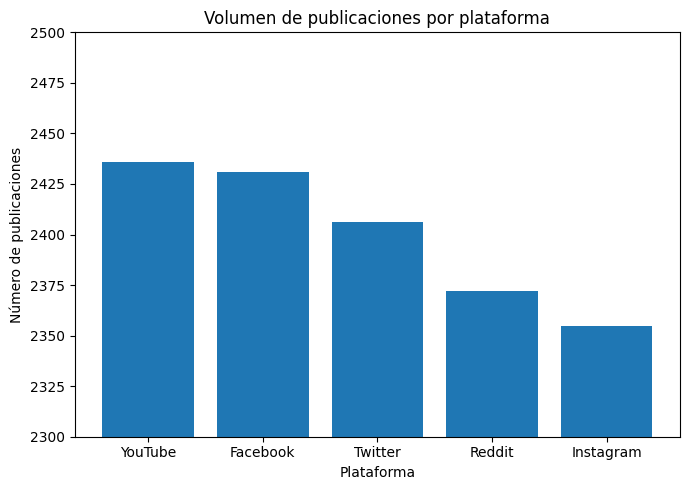

In [88]:
posts_por_plataforma = df_copia["plataforma"].value_counts()

plt.figure(figsize=(7, 5))
plt.bar(posts_por_plataforma.index, posts_por_plataforma.values)

plt.ylim(2300, 2500)
plt.xlabel("Plataforma")
plt.ylabel("Número de publicaciones")
plt.title("Volumen de publicaciones por plataforma")
plt.tight_layout()
plt.show()


Engagemente medio por plataforma (Instagram la que mas!!!)

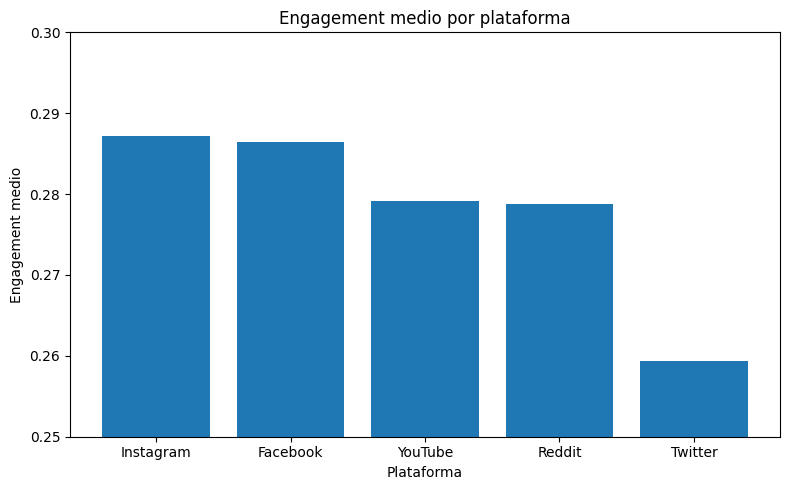

In [89]:
eng_plataforma = df_copia.groupby("plataforma")["tasa_compromiso"].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
plt.bar(eng_plataforma.index, eng_plataforma.values)
plt.ylim(0.25, 0.3)
plt.xlabel("Plataforma")
plt.ylabel("Engagement medio")
plt.title("Engagement medio por plataforma")
plt.tight_layout()
plt.show()


Interacciones por plataforma y continente

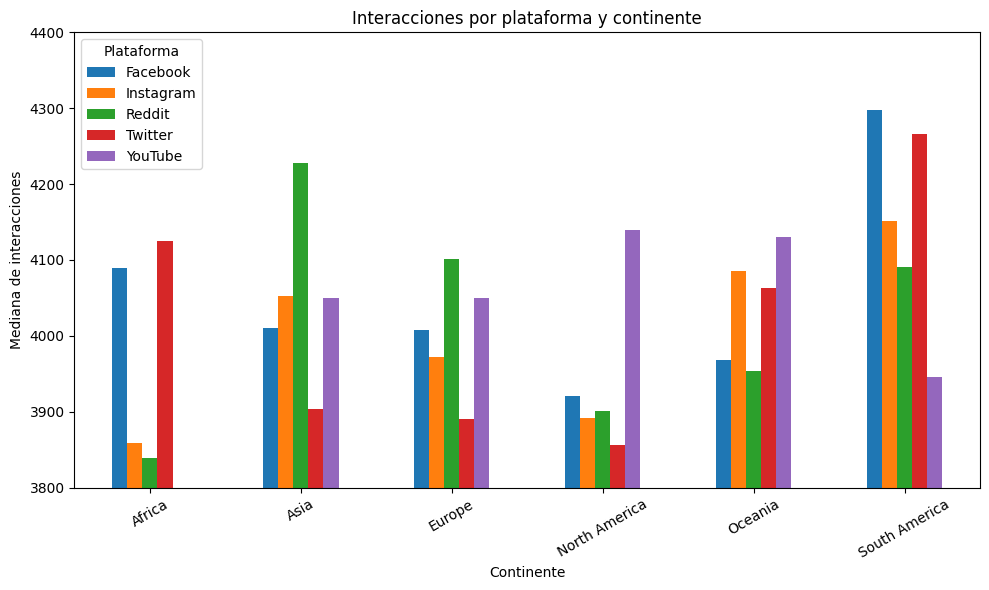

In [90]:
tabla_pc = (
    df_copia
    .pivot_table(
        values="interacciones_totales",
        index="continente",
        columns="plataforma",
        aggfunc="median"
    )
)

tabla_pc.plot(
    kind="bar",
    figsize=(10, 6)
)
plt.ylim(3800, 4400)
plt.xlabel("Continente")
plt.ylabel("Mediana de interacciones")
plt.title("Interacciones por plataforma y continente")
plt.xticks(rotation=30)
plt.legend(title="Plataforma")
plt.tight_layout()
plt.show()

## Volumetria por tiempo
Volumen de publicaciones por mes

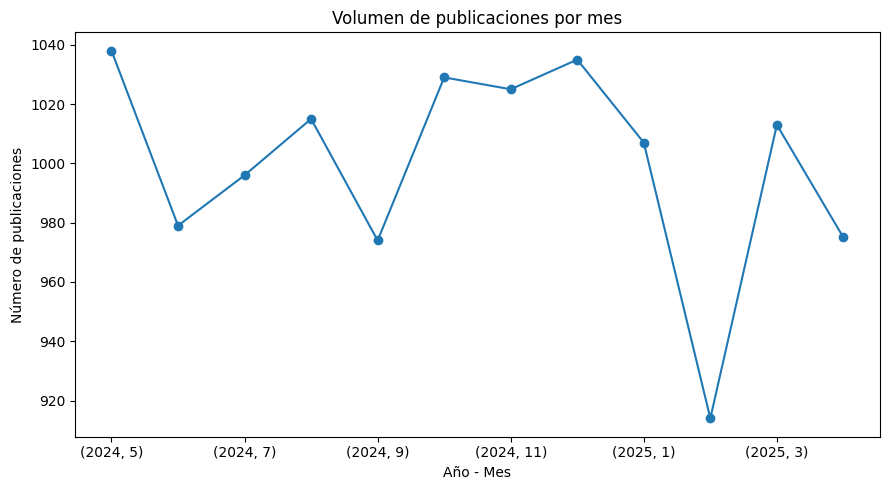

In [91]:
posts_por_mes = (
    df_copia
    .groupby(["Año", "Mes"])
    .size()
)

plt.figure(figsize=(9, 5))
posts_por_mes.plot(kind="line", marker="o")

plt.xlabel("Año - Mes")
plt.ylabel("Número de publicaciones")
plt.title("Volumen de publicaciones por mes")
plt.tight_layout()
plt.show()

Interacciones por dia de la seman

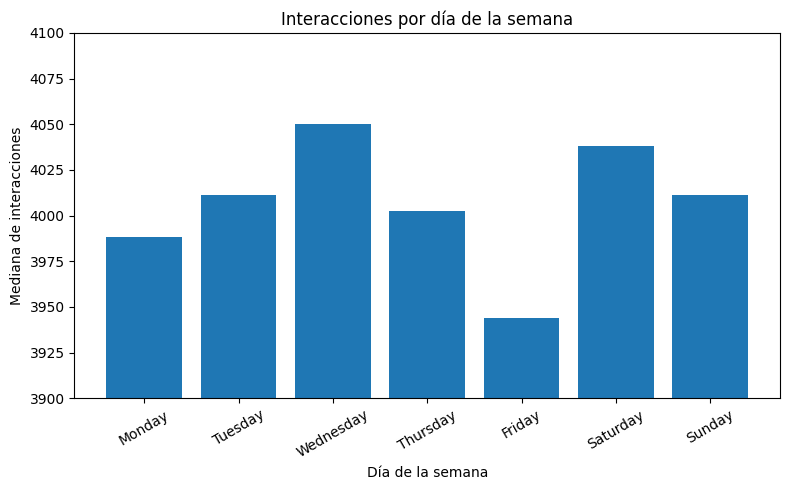

In [92]:
# Agrupar
interacciones_por_dia = (
    df_copia
    .groupby("dia_semana")["interacciones_totales"]
    .median()
    .reindex(orden_dias)
)

# Plot
plt.figure(figsize=(8, 5))
plt.ylim(3900, 4100)
plt.bar(interacciones_por_dia.index, interacciones_por_dia.values)
plt.xlabel("Día de la semana")
plt.ylabel("Mediana de interacciones")
plt.title("Interacciones por día de la semana")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

Engagement medio por dia de la semana

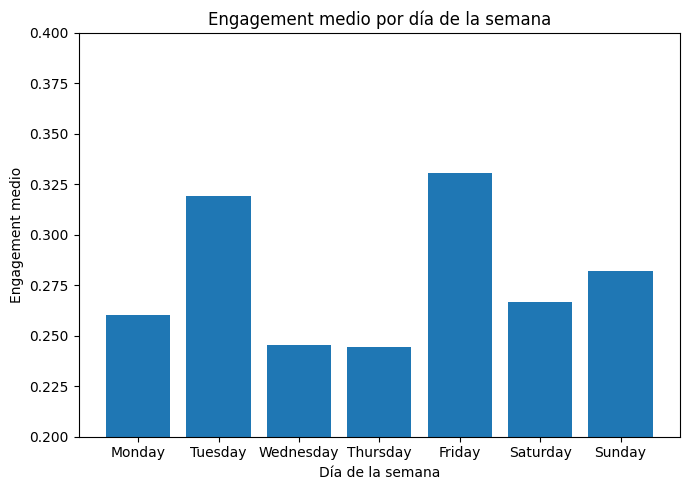

In [93]:
eng_dia = (
    df_copia
    .groupby("dia_semana")["tasa_compromiso"]
    .mean()
    .reindex(orden_dias)
)

plt.figure(figsize=(7, 5))
plt.bar(eng_dia.index, eng_dia.values)
plt.ylim(0.2, 0.4)
plt.xlabel("Día de la semana")
plt.ylabel("Engagement medio")
plt.title("Engagement medio por día de la semana")
plt.tight_layout()
plt.show()




Interacciones y numero de posts por hora del día

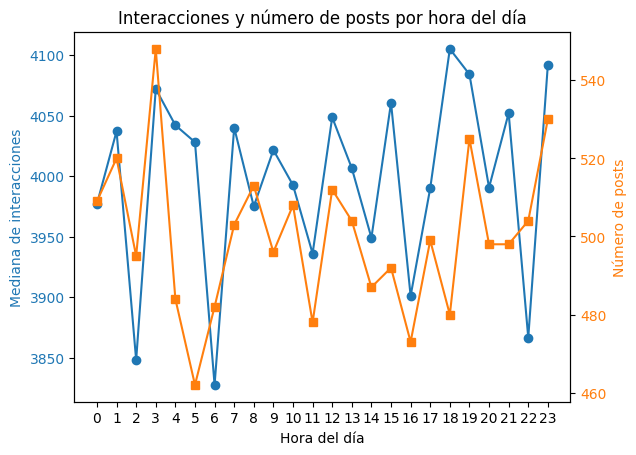

In [94]:
# Métricas por hora
interacciones_por_hora = (
    df_copia
    .groupby("Hora")["interacciones_totales"]
    .median()
    .sort_index()
)

posts_por_hora = (
    df_copia
    .groupby("Hora")
    .size()
    .sort_index()
)

# Crear figura y primer eje
fig, ax1 = plt.subplots()

# Línea 1: interacciones
ax1.plot(
    interacciones_por_hora.index,
    interacciones_por_hora.values,
    marker="o",
    color="tab:blue",
    label="Mediana de interacciones"
)
ax1.set_xlabel("Hora del día")
ax1.set_ylabel("Mediana de interacciones", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")
ax1.set_xticks(range(0, 24))

# Segundo eje Y
ax2 = ax1.twinx()

# Línea 2: número de posts
ax2.plot(
    posts_por_hora.index,
    posts_por_hora.values,
    marker="s",
    color="tab:orange",
    label="Número de posts"
)
ax2.set_ylabel("Número de posts", color="tab:orange")
ax2.tick_params(axis="y", labelcolor="tab:orange")

# Título
plt.title("Interacciones y número de posts por hora del día")

plt.show()

## Analisis de marcas
Top 10 marcas por posts

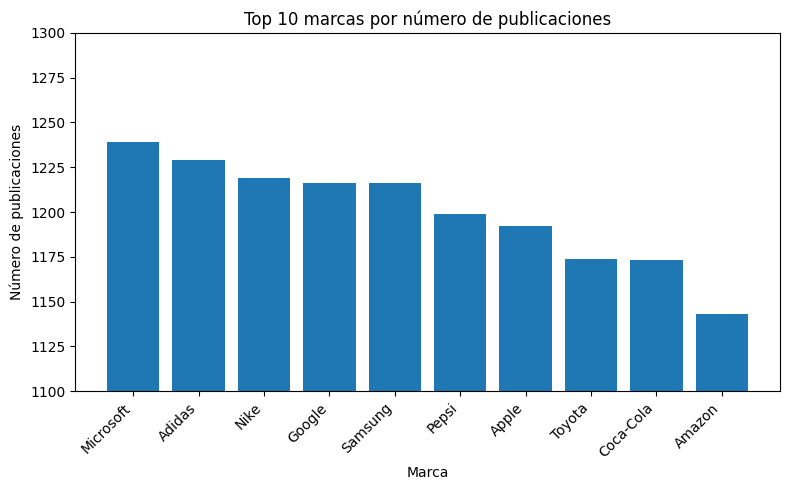

In [95]:
posts_por_marca = (
    df_copia
    .dropna(subset=["nombre_marca"])
    ["nombre_marca"]
    .value_counts()
    .head(10)
)

plt.figure(figsize=(8, 5))
plt.bar(posts_por_marca.index, posts_por_marca.values)
plt.ylim(1100, 1300)
plt.xlabel("Marca")
plt.ylabel("Número de publicaciones")
plt.title("Top 10 marcas por número de publicaciones")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()




Engagemn¡ent medio de colaboraciones por plataforma

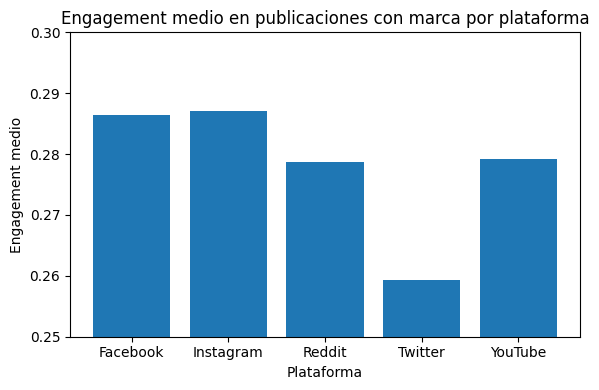

In [96]:
marca_plataforma = (
    df_copia
    .dropna(subset=["nombre_marca"])
    .groupby(["plataforma"])["tasa_compromiso"]
    .mean()
)
plt.figure(figsize=(6, 4))
plt.bar(marca_plataforma.index, marca_plataforma.values)

plt.ylim(0.25, 0.3)
plt.xlabel("Plataforma")
plt.ylabel("Engagement medio")
plt.title("Engagement medio en publicaciones con marca por plataforma")
plt.tight_layout()
plt.show()


Numero de post en instagram

In [97]:
df_instagram = df_copia[df_copia["plataforma"] == "Instagram"]

num_posts_instagram = df_instagram.shape[0]

num_posts_instagram


2355

## Volumetria en instagram
Distribucion de publicaciones por continente

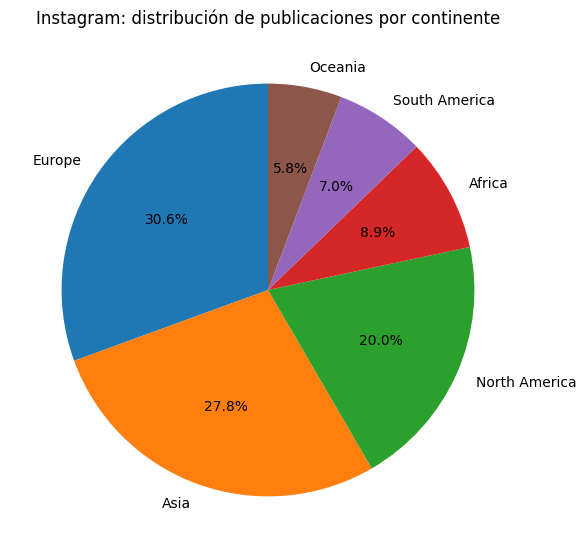

In [98]:
continente_ig = df_instagram["continente"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    continente_ig.values,
    labels=continente_ig.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Instagram: distribución de publicaciones por continente")
plt.tight_layout()
plt.show()


Top 10 paises con mas publicaciones en instagram

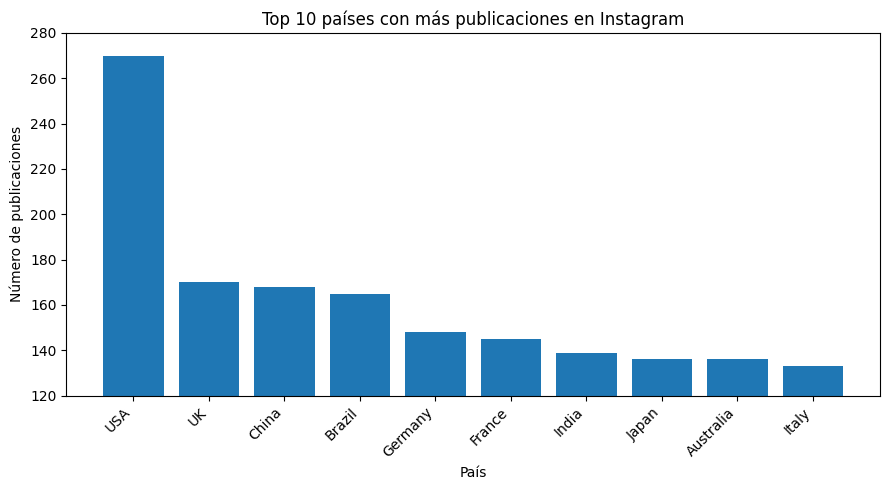

In [99]:
posts_por_pais_instagram = (
    df_instagram["pais"]
    .value_counts()
    .head(10)
)

plt.figure(figsize=(9, 5))
plt.bar(
    posts_por_pais_instagram.index,
    posts_por_pais_instagram.values
)

plt.ylim(120, 280)
plt.xlabel("País")
plt.ylabel("Número de publicaciones")
plt.title("Top 10 países con más publicaciones en Instagram")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Top 10 paises con mas interacciones en instagram

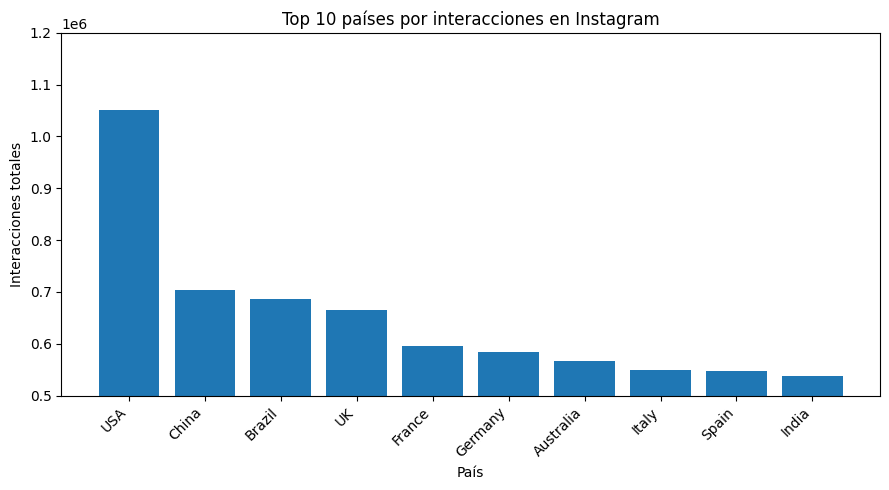

In [100]:
interacciones_por_pais_instagram = (
    df_instagram
    .groupby("pais")["interacciones_totales"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(9, 5))
plt.bar(
    interacciones_por_pais_instagram.index,
    interacciones_por_pais_instagram.values
)

plt.ylim(500000, 1200000)
plt.xlabel("País")
plt.ylabel("Interacciones totales")
plt.title("Top 10 países por interacciones en Instagram")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Top 10 paises con mas engagement en instagram

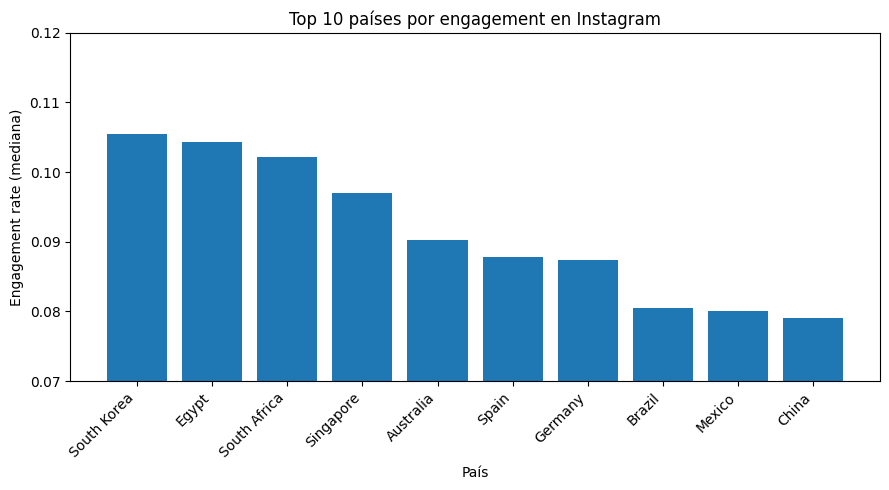

In [101]:
engagement_por_pais_instagram = (
    df_instagram
    .groupby("pais")["tasa_compromiso"]
    .median()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(9, 5))
plt.bar(
    engagement_por_pais_instagram.index,
    engagement_por_pais_instagram.values
)

plt.ylim(0.07, 0.12)
plt.xlabel("País")
plt.ylabel("Engagement rate (mediana)")
plt.title("Top 10 países por engagement en Instagram")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


## Volumetria por tiempo en instagram
Interacciones medias por dia

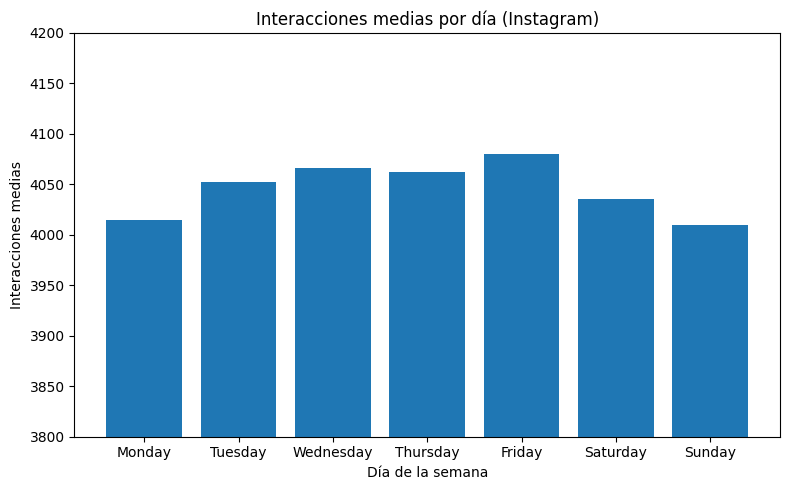

In [102]:
interacciones_dia = (
    df_instagram
    .groupby("dia_semana")["interacciones_totales"]
    .mean()
    .reindex(orden_dias)
)

plt.figure(figsize=(8, 5))
plt.bar(interacciones_dia.index, interacciones_dia.values)

plt.ylim(3800, 4200)
plt.xlabel("Día de la semana")
plt.ylabel("Interacciones medias")
plt.title("Interacciones medias por día (Instagram)")
plt.tight_layout()
plt.show()


Engagement medio por dia en instagram

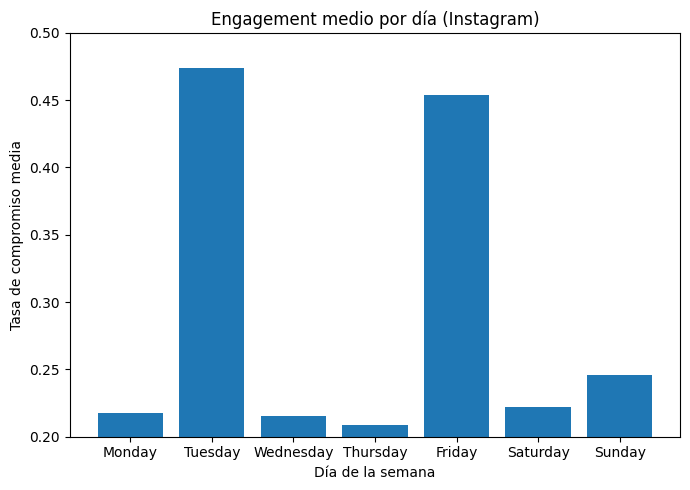

In [103]:
engagement_dia = (
    df_instagram
    .groupby("dia_semana")["tasa_compromiso"]
    .mean()
    .reindex(orden_dias)
)

plt.figure(figsize=(7, 5))
plt.bar(engagement_dia.index, engagement_dia.values)

plt.ylim(0.2, 0.5)
plt.xlabel("Día de la semana")
plt.ylabel("Tasa de compromiso media")
plt.title("Engagement medio por día (Instagram)")
plt.tight_layout()
plt.show()


## Analisis de marcas en instagram
Top 10 marcas por engagement medio en instagram

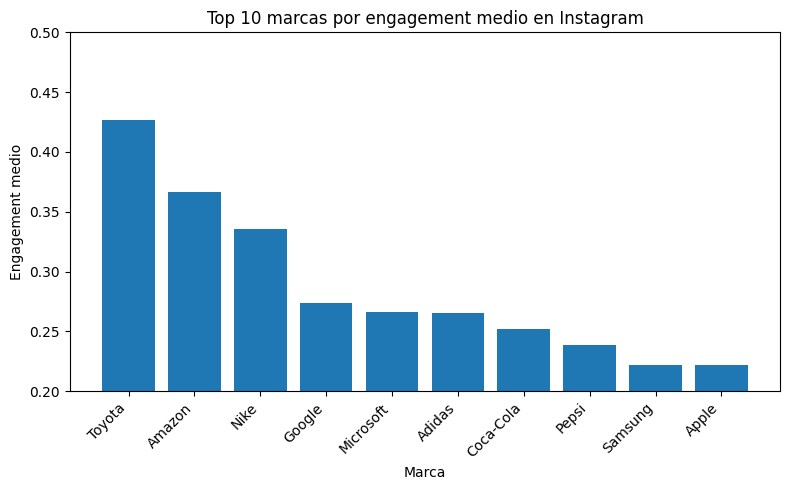

In [104]:
top_marcas_engagement = (
    df_instagram
    .groupby("nombre_marca")["tasa_compromiso"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(8, 5))
plt.bar(top_marcas_engagement.index, top_marcas_engagement.values)

plt.ylim(0.2, 0.5)
plt.xlabel("Marca")
plt.ylabel("Engagement medio")
plt.title("Top 10 marcas por engagement medio en Instagram")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Dsitribucion de colaboraciones

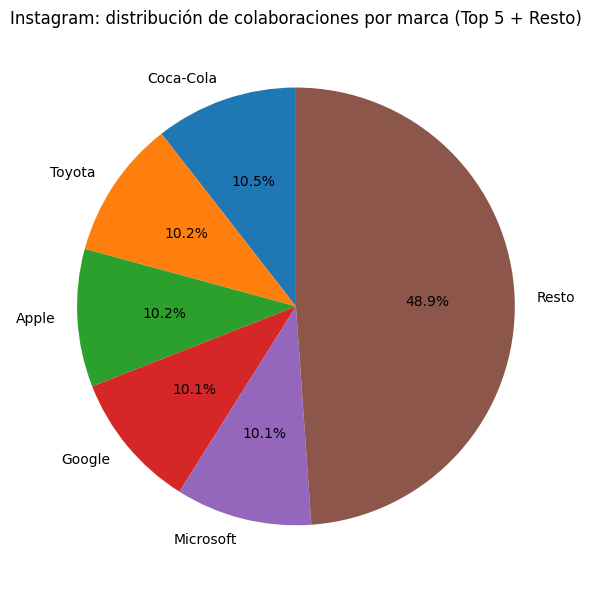

In [105]:
# Solo posts con marca en Instagram
marcas_ig = (
    df_instagram
    .dropna(subset=["nombre_marca"])
    ["nombre_marca"]
    .value_counts()
)

# Top 5 marcas
top5 = marcas_ig.head(5)

# Sumar el resto
resto = marcas_ig.iloc[5:].sum()

# Añadir "Resto"
top5_resto = top5.copy()
top5_resto["Resto"] = resto

# Gráfico
plt.figure(figsize=(6,6))
plt.pie(
    top5_resto.values,
    labels=top5_resto.index,
    autopct="%1.1f%%",
    startangle=90
)

plt.title("Instagram: distribución de colaboraciones por marca (Top 5 + Resto)")
plt.tight_layout()
plt.show()



COlaboraciones por continente

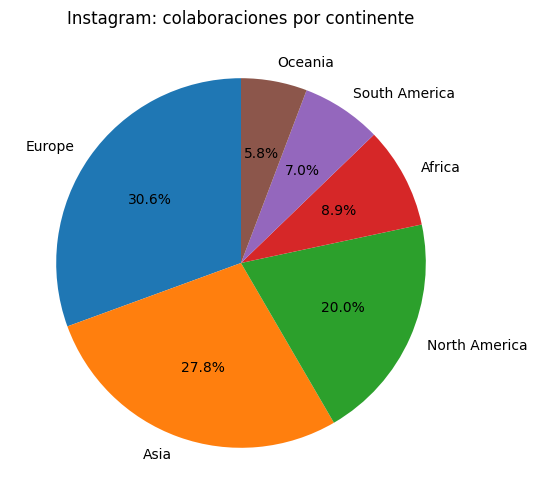

In [106]:
colab_continente = (
    df_instagram["continente"]
    .value_counts()
)

plt.figure(figsize=(6,6))
plt.pie(colab_continente.values,
        labels=colab_continente.index,
        autopct="%1.1f%%",
        startangle=90)

plt.title("Instagram: colaboraciones por continente")
plt.show()


Paises con mas colaboraciones

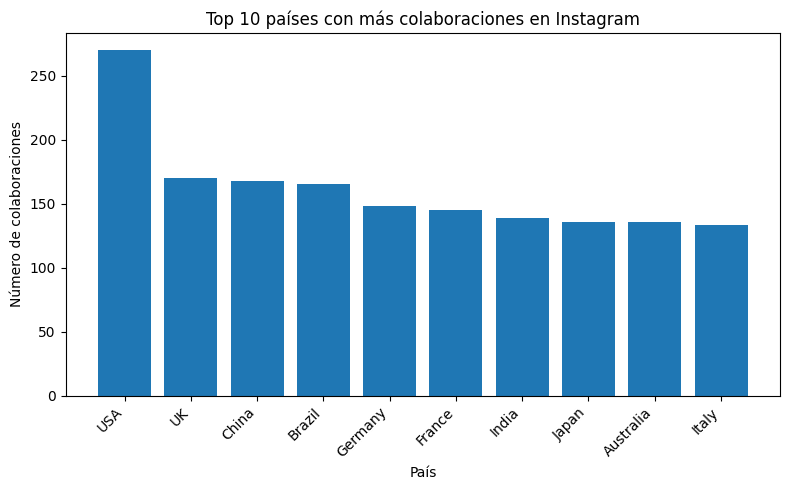

In [107]:
# Top 10 países por número de colaboraciones
top_paises_colab = (
    df_instagram["pais"]
    .value_counts()
    .head(10)
)

# Gráfico de barras
plt.figure(figsize=(8,5))
plt.bar(top_paises_colab.index, top_paises_colab.values)

plt.xlabel("País")
plt.ylabel("Número de colaboraciones")
plt.title("Top 10 países con más colaboraciones en Instagram")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
